In [1]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/High_dimensional_stat/notebook/

/content/drive/My Drive/Colab Notebooks/High_dimensional_stat/notebook


In [80]:
#Setting up the mapping from ticker to country
etfs = {"EWJ":"Japan","EWZ":"Brazil",
        "FXI":"China","EWY":"South Korea",
        "EWT":"Taiwan","EWH":"Hong Kong",
        "EWC":"Canada","EWG":"Germany",
        "EWU":"United Kingdom","EWA":"Australia",
        "EWW":"Mexico","EWL":"Switzerland",
        "EWP":"Spain","EWQ":"France",
        "EIDO":"Indonesia","ERUS":"Russia",
        "EWS":"Singapore","EWM":"Malaysia",
        "EZA":"South Africa","THD":"Thailand",
        "ECH":"Chile","EWI":"Italy",
        "TUR":"Turkey","EPOL":"Poland",
        "EPHE":"Philippines","EWD":"Sweden",
        "EWN":"Netherlands","EPU":"Peru",
        "ENZL":"New Zealand","EIS":"Israel",
        "EWO":"Austria","EIRL":"Ireland","EWK":"Belgium"}

etfs=dict(sorted(etfs.items(), key=lambda item: item[1]))

{'ECH': 'Chile',
 'EIDO': 'Indonesia',
 'EIRL': 'Ireland',
 'EIS': 'Israel',
 'ENZL': 'New Zealand',
 'EPHE': 'Philippines',
 'EPOL': 'Poland',
 'EPU': 'Peru',
 'ERUS': 'Russia',
 'EWA': 'Australia',
 'EWC': 'Canada',
 'EWD': 'Sweden',
 'EWG': 'Germany',
 'EWH': 'Hong Kong',
 'EWI': 'Italy',
 'EWJ': 'Japan',
 'EWK': 'Belgium',
 'EWL': 'Switzerland',
 'EWM': 'Malaysia',
 'EWN': 'Netherlands',
 'EWO': 'Austria',
 'EWP': 'Spain',
 'EWQ': 'France',
 'EWS': 'Singapore',
 'EWT': 'Taiwan',
 'EWU': 'United Kingdom',
 'EWW': 'Mexico',
 'EWY': 'South Korea',
 'EWZ': 'Brazil',
 'EZA': 'South Africa',
 'FXI': 'China',
 'THD': 'Thailand',
 'TUR': 'Turkey'}

In [18]:
link = "https://query1.finance.yahoo.com/v7/finance/download/{stock_name}?period1=1451174400&period2=1609027200&interval=1d&events=history&includeAdjustedClose=true" # .format("EWJ")
import requests
import urllib


for key, value in etfs.items():
  url = link.format(stock_name =key)


  r = requests.get(url, allow_redirects=True)
  open('{file_name}.csv'.format(file_name=key), 'wb').write(r.content)


https://query1.finance.yahoo.com/v7/finance/download/{stock_name}?period1=1451174400&period2=1609027200&interval=1d&events=history&includeAdjustedClose=true


In [82]:
import numpy as np
symbols, names = np.array(sorted(etfs.items())).T


array(['ECH', 'EIDO', 'EIRL', 'EIS', 'ENZL', 'EPHE', 'EPOL', 'EPU',
       'ERUS', 'EWA', 'EWC', 'EWD', 'EWG', 'EWH', 'EWI', 'EWJ', 'EWK',
       'EWL', 'EWM', 'EWN', 'EWO', 'EWP', 'EWQ', 'EWS', 'EWT', 'EWU',
       'EWW', 'EWY', 'EWZ', 'EZA', 'FXI', 'THD', 'TUR'], dtype='<U14')

In [71]:
import pandas as pd


In [ ]:

li = []

for key in symbols:
    filename='./'+key+'.csv'
    df = pd.read_csv(filename, index_col='Date',usecols=["Date",'Close'], header=0)
    df=df.rename(columns={"Close": key})
    li.append(df)


In [86]:

frame = pd.concat(li, axis=1)


,ECH,EIDO,EIRL,EIS,ENZL,EPHE,EPOL,EPU,ERUS,EWA,EWC,EWD,EWG,EWH,EWI,EWJ,EWK,EWL,EWM,EWN,EWO,EWP,EWQ,EWS,EWT,EWU,EWW,EWY,EWZ,EZA,FXI,THD,TUR
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-28,32.330002,21.200001,41.520000,49.389999,36.990002,34.139999,18.600000,20.379999,22.160000,18.690001,21.650000,29.629999,26.730000,19.830000,28.139999,48.520000,18.250000,31.469999,30.760000,24.180000,15.90,28.870001,24.510000,20.719999,26.139999,32.619999,50.860001,50.570000,21.719999,48.619999,35.869999,59.070000,37.900002
2015-12-29,32.330002,21.170000,42.080002,49.630001,37.619999,34.189999,18.740000,20.280001,22.639999,19.200001,21.900000,29.930000,27.040001,19.969999,28.340000,49.240002,18.430000,31.719999,31.240000,24.400000,15.88,28.940001,24.740000,20.799999,25.879999,32.820000,50.540001,50.680000,21.600000,48.169998,35.990002,59.000000,37.660000
2015-12-30,32.130001,21.000000,41.950001,49.320000,37.599998,33.919998,18.299999,20.200001,22.080000,19.160000,21.660000,29.600000,26.620001,19.910000,27.920000,48.959999,18.320000,31.680000,30.920000,24.240000,15.84,28.780001,24.559999,20.680000,25.500000,32.599998,49.750000,50.080002,20.790001,46.910000,35.410000,58.759998,37.040001
2015-12-31,31.920000,20.870001,41.560001,49.189999,37.480000,33.740002,18.080000,20.180000,22.260000,18.959999,21.500000,29.180000,26.190001,19.820000,27.480000,48.480000,18.059999,31.040001,30.959999,23.840000,15.65,28.270000,24.209999,20.559999,25.540001,32.279999,49.830002,49.669998,20.680000,46.709999,35.290001,58.639999,36.360001
2016-01-04,31.570000,20.549999,41.330002,48.720001,37.200001,33.380001,17.549999,20.059999,21.740000,18.700001,21.190001,28.580000,25.559999,19.389999,27.080000,47.720001,17.930000,30.690001,29.959999,23.450001,15.47,27.889999,23.820000,20.100000,24.760000,31.760000,49.070000,48.509998,19.940001,45.610001,34.150002,57.709999,35.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,29.719999,23.959999,50.770000,62.349998,65.489998,33.040001,19.110001,34.820000,37.910000,23.990000,30.980000,40.060001,32.040001,24.020000,29.280001,66.570000,19.790001,44.310001,29.129999,41.189999,19.41,27.080000,33.310001,21.500000,51.570000,29.379999,42.590000,81.220001,37.700001,45.160000,45.750000,80.160004,24.860001
2020-12-21,29.049999,23.870001,50.209999,61.139999,64.930000,32.590000,18.510000,34.410000,36.480000,23.799999,30.750000,39.599998,31.389999,23.820000,28.850000,65.849998,19.559999,43.689999,28.770000,40.820000,19.17,26.540001,32.820000,21.320000,51.650002,28.879999,41.880001,80.449997,36.619999,44.000000,45.380001,75.089996,24.490000
2020-12-22,29.389999,22.799999,49.910000,62.119999,65.620003,32.150002,18.639999,33.970001,36.189999,23.650000,30.709999,39.310001,31.290001,23.629999,29.030001,65.820000,19.420000,43.590000,28.420000,40.820000,19.34,26.530001,32.790001,21.080000,51.060001,28.820000,40.980000,79.190002,36.599998,43.259998,45.230000,75.019997,24.570000


In [87]:
df = np.log1p(frame.pct_change()).iloc[1:]



,ECH,EIDO,EIRL,EIS,ENZL,EPHE,EPOL,EPU,ERUS,EWA,EWC,EWD,EWG,EWH,EWI,EWJ,EWK,EWL,EWM,EWN,EWO,EWP,EWQ,EWS,EWT,EWU,EWW,EWY,EWZ,EZA,FXI,THD,TUR
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-29,0.000000,-0.001416,0.013397,0.004848,0.016888,0.001463,0.007499,-0.004919,0.021429,0.026922,0.011481,0.010074,0.011531,0.007035,0.007082,0.014730,0.009815,0.007913,0.015484,0.009057,-0.001259,0.002422,0.009340,0.003854,-0.009996,0.006113,-0.006312,0.002173,-0.005540,-0.009299,0.003340,-0.001186,-0.006353
2015-12-30,-0.006205,-0.008063,-0.003094,-0.006266,-0.000532,-0.007928,-0.023759,-0.003953,-0.025046,-0.002086,-0.011019,-0.011087,-0.015654,-0.003009,-0.014931,-0.005703,-0.005986,-0.001262,-0.010296,-0.006579,-0.002522,-0.005544,-0.007302,-0.005786,-0.014792,-0.006726,-0.015755,-0.011910,-0.038221,-0.026506,-0.016247,-0.004076,-0.016600
2015-12-31,-0.006557,-0.006210,-0.009340,-0.002639,-0.003197,-0.005321,-0.012095,-0.000991,0.008119,-0.010493,-0.007414,-0.014291,-0.016285,-0.004531,-0.015885,-0.009852,-0.014294,-0.020409,0.001293,-0.016639,-0.012067,-0.017880,-0.014353,-0.005820,0.001567,-0.009864,0.001607,-0.008221,-0.005305,-0.004273,-0.003395,-0.002044,-0.018529
2016-01-04,-0.011025,-0.015452,-0.005550,-0.009601,-0.007499,-0.010727,-0.029752,-0.005964,-0.023637,-0.013808,-0.014524,-0.020776,-0.024349,-0.021934,-0.014663,-0.015801,-0.007224,-0.011340,-0.032833,-0.016494,-0.011568,-0.013533,-0.016240,-0.022628,-0.031016,-0.016240,-0.015369,-0.023631,-0.036439,-0.023831,-0.032837,-0.015987,-0.029020
2016-01-05,0.007259,0.023565,-0.011437,0.003279,-0.012987,0.005974,-0.019563,0.000997,0.016424,-0.015087,-0.004730,-0.017650,-0.009434,0.003604,-0.002959,0.012495,-0.008964,-0.002283,0.007979,-0.005130,-0.000647,-0.008642,-0.009703,0.003972,-0.003236,-0.002522,-0.003062,0.004320,0.013944,0.003502,-0.005579,-0.002255,-0.004540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,-0.004365,-0.005411,-0.005304,0.010642,-0.025776,0.002424,-0.021228,-0.000861,-0.012582,-0.012428,-0.011234,0.001749,-0.002182,-0.004983,-0.006468,-0.002850,-0.004034,0.000451,-0.012622,-0.000243,-0.007698,-0.013206,-0.005389,-0.003714,-0.003098,-0.011506,-0.020912,-0.006015,-0.005027,0.011805,-0.001747,-0.005722,0.016221
2020-12-21,-0.022802,-0.003763,-0.011091,-0.019597,-0.008588,-0.013713,-0.031901,-0.011845,-0.038451,-0.007952,-0.007452,-0.011549,-0.020496,-0.008361,-0.014795,-0.010875,-0.011690,-0.014091,-0.012435,-0.009023,-0.012442,-0.020142,-0.014820,-0.008407,0.001550,-0.017165,-0.016811,-0.009526,-0.029066,-0.026022,-0.008120,-0.065337,-0.014995
2020-12-22,0.011636,-0.045862,-0.005993,0.015902,0.010571,-0.013593,0.006999,-0.012869,-0.007981,-0.006322,-0.001302,-0.007350,-0.003191,-0.008009,0.006220,-0.000456,-0.007183,-0.002291,-0.012240,0.000000,0.008829,-0.000377,-0.000914,-0.011321,-0.011489,-0.002080,-0.021724,-0.015786,-0.000546,-0.016961,-0.003311,-0.000933,0.003261


In [88]:
#Calling Glasso algorithm
import sklearn
from sklearn import covariance
edge_model = covariance.GraphicalLassoCV(cv=10)
df /= df.std(axis=0)
edge_model.fit(df)
#the precision(inverse covariance) matrix that we want
p = edge_model.precision_

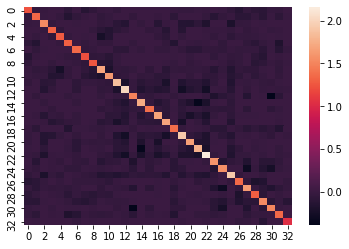

In [89]:
import seaborn as sns
sns.heatmap(p)


In [90]:
import networkx as nx

In [ ]:
#prepare the matrix for network illustration
p_loc = pd.DataFrame(p, columns=names, index=names)
# p_loc = pd.DataFrame(p)

links = p_loc.stack().reset_index()
links.columns = ['var1', 'var2','value']
links=links.loc[ (abs(links['value']) > 0.17) &  (links['var1'] != links['var2']) ]
# you can change the value of min precision as per your need

#build the graph using networkx lib
G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
pos = nx.spring_layout(G, k=0.2*1/np.sqrt(len(G.nodes())), iterations=20)

import matplotlib.pyplot as plt

plt.figure(3, figsize=(10, 10))
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.show()